In [204]:
%matplotlib inline

import numpy as np
from collections import OrderedDict, Counter, defaultdict
import pandas as pd

import Bio
from Bio import SeqIO

import seaborn as sns
import matplotlib.pyplot as plt

import glob

import subprocess
from subprocess import call

import re

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas

import pickle

from scipy import stats

import numpy as np
from scipy.spatial.distance import cdist

In [71]:
# open SET1 (PhyloSET) and SET2 (RiboSET)
PhyloSET = pd.read_csv('../tmp_res/SET1.txt', sep='\t')



RiboSET = pd.read_csv('../tmp_res/SET2.txt', sep='\t')

RiboSET['tr_id1'] = [x.split('.')[0] for x in RiboSET['tr_id'].tolist()]

RiboSET = RiboSET[(~RiboSET['Riboseq_Summary'].str.contains('ATG')) & 
                  (~RiboSET['tr_id'].str.contains('PAR'))]

print (RiboSET.shape[0])

390


In [72]:
metadata_pc_g25 = pd.read_csv('../tmp_res/metadata_pc_g25.txt', sep='\t')
metadata_pc_g25[0:1]

,tr_id,gene,gene_tr,transcript_seq,5UTR_start_seq,CDS_start,cds_seq,cds_start_codon,cds_stop_codon,cds_start_pos,cds_stop_pos,utr5_start,utr5_end,record_id
0,ENST00000335137.3,OR4F5,OR4F5-001,ATGGTGACTGAATTCATTTTTCTGGGTCTCTCTGATTCTCAGGAAC...,NaN,ATG,ATGGTGACTGAATTCATTTTTCTGGGTCTCTCTGATTCTCAGGAAC...,ATG,TAG,0,918,0,0,ENST00000335137.3|ENSG00000186092.4|OTTHUMG000...


In [73]:
# open metadata with scores and metrics
meta = pd.read_csv('../tmp_res/local_and_global_df_g25ovlp_g35ovlp_g38ovlp_refseqovlp_strand_FRAMES_PhyloCSF.txt', sep='\t')
meta[0:1]

,tr_id,N_term_start,N_term_end,len,N_term_start1,N_term_end1,len_codons,gene,50len_flag,global_coo_50_and_less,...,max_sum_overlap_refseq_all_exons,max_sum_overlap_refseq_all_exons_strandless,ovlp,ovlp_strandless,ovlp2,ovlp2_strandless,PhyloCSF120score,tr_id1,number_of_records,records_names
0,ENST00000624431.1,274,316,42,274,316,14.0,FO538757.2,274,chr1:182667-182708,...,0,0,0;0;0,0;0;0,0;0;0;0,0;0;0;0,-163.9926,ENST00000624431,85,Human; Gorilla; Orangutan; Golden_snub_nosed_m...


In [74]:
print (meta.shape[0])

77513


In [205]:
# theor ext length >=19 codons
# excluded genes with NTE cov > 0 in trips-viz pred ranked genes 
# keep only transcripts with CDS complete sequence 
df3 = pd.read_csv('../tmp_res/25079_19codons_UPD_trs_coverages.txt', sep='\t')

df3.columns = ['tr_id1', 'Z_score', 'CDS_coverage', 'NTE_coverage',
       'CDS_nonzero_fraction', 'NTE_nonzero_fraction']


df3.shape[0]

FileNotFoundError: [Errno 2] No such file or directory: '../tmp_res/25079_19codons_UPD_trs_coverages.txt'

### top-5000 by rank, theor ext len >=20codons, CDS cov > 0

In [201]:
# ~4k RiboSET ext with non-zero CDS cov in my data 
RiboSET_EXT_cds_cov_nonzero = pd.read_csv('tmp_res/RiboSET_EXT_cds_cov_nonzero_theor_len_20codons_3663genes.txt', sep='\t')
RiboSET_EXT_cds_cov_nonzero.shape[0]

3663

In [203]:
RiboSET_EXT_cds_cov_nonzero[RiboSET_EXT_cds_cov_nonzero['NTE_coverage'] != 0]

,tr_id1,Z_score,CDS_coverage,NTE_coverage,CDS_nonzero_fraction,NTE_nonzero_fraction
0,ENST00000379454,0.032101,298.318841,317.934783,0.332894,0.260870
1,ENST00000216281,0.139750,195.778990,441.650000,0.158709,0.194444
2,ENST00000409753,-0.352664,750.896774,295.191489,0.331183,0.262411
3,ENST00000321358,0.295986,156.987692,769.086957,0.062564,0.309353
4,ENST00000314940,-0.077727,535.316993,477.173913,0.332244,0.333333
...,...,...,...,...,...,...
3619,ENST00000255082,-0.153732,0.328125,0.190476,0.064583,0.031746
3621,ENST00000342740,-0.109766,0.169701,0.090909,0.033989,0.015152
3638,ENST00000558480,-0.253110,2.022258,0.027027,0.080816,0.009009
3644,ENST00000419421,-0.181374,0.132388,0.028571,0.026793,0.009524


# Get CDS coverage for RiboSET and matching set of 392 genes with no upstream translation

In [359]:
#RiboSET_CDS_cov_df = df.copy()

In [193]:
RiboSET_CDS_cov_df = pd.read_csv('tmp_res/RiboSET_392_df_coverages.txt', sep='\t')
RiboSET_CDS_cov_df[0:2]

,tr_id,Z_score,CDS_coverage,NTE_coverage,CDS_nonzero_fraction,NTE_nonzero_fraction
0,ENST00000379389,-0.731864,284.150602,31.120000,0.333333,0.178808
1,ENST00000349431,-0.508594,102.473077,46.859375,0.332051,0.250000


In [ ]:
# Instead of matching CDS distribution => take all genes with CDS cov over min 

In [196]:
min(RiboSET_CDS_cov_df['CDS_coverage'].tolist())

0.06976744186046513

# 393 withouth PAR transcripts; 390 withouth ATG-ones 

In [148]:
RiboSET_CDS_cov_df.columns = ['tr_id1', 'Z_score', 'CDS_coverage', 'NTE_coverage',
       'CDS_nonzero_fraction', 'NTE_nonzero_fraction']
RiboSET_CDS_cov_df = RiboSET_CDS_cov_df[RiboSET_CDS_cov_df['tr_id1'].isin(RiboSET['tr_id1'].tolist())]

# Get CDS coverage for RiboSET_ext and matching set of 3,8k genes with no upstream translation and cds-cov > 0

In [197]:
RiboSET_EXT.shape[0]

3722

In [152]:
out_counts2 = {'amb':{}, 'unamb':{}, 'all':{}}

for i, tr_id in enumerate(RiboSET_EXT['tr_id1'].tolist()):   
    
    if i % 500 == 0:
        print ('transcript %s is processed out of 76910' % i)
    # end of transcript = its length
    tr_length = len(metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq)
    tr_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq
    gene = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].gene
            
    if tr_id in list_of_unamb_tr:    
            
        tr_path_unamb = '../data/counts_ext/download/N_term_unamb/%s_counts.txt' % tr_id
        df_unamb = pd.read_csv(tr_path_unamb, sep='\t')
        d_unamb = dict(zip(df_unamb['pos'].tolist(), df_unamb['Total'].tolist()))
            
        for i in range(0, tr_length):
            if i not in d_unamb:
                d_unamb[i] = 0
                
        out_counts2['unamb'][tr_id] = d_unamb 
        
    else: # if tr_id is not in amb list
        continue
        #print ('%s is not in unamb list' % tr_id)
           
            
# save it to tmp_res            
with open('tmp_res/RiboSET_4k.pickle', 'wb') as handle:
    pickle.dump(out_counts2, handle, protocol=pickle.HIGHEST_PROTOCOL)

transcript 0 is processed out of 76910
transcript 500 is processed out of 76910
transcript 1000 is processed out of 76910
transcript 1500 is processed out of 76910
transcript 2000 is processed out of 76910
transcript 2500 is processed out of 76910
transcript 3000 is processed out of 76910
transcript 3500 is processed out of 76910


In [153]:
out_df_frames_un2 = {}

for i, tr_id in enumerate(list(out_counts2['unamb'].keys())):
    
    if i % 1000 == 0:
        print (i)
        
    d = out_counts2['unamb'][tr_id]
    # d = dict with positioons and counts 
    frames = {'Frame_1': {}, 'Frame_2': {}, 'Frame_3': {} }
    for pos, counts in d.items():
        if pos % 3 == 2:
            frames['Frame_1'][pos] = counts
        elif pos % 3 == 0:
            frames['Frame_2'][pos] = counts
        else:
            frames['Frame_3'][pos] = counts
    # make df 
    li1 = []
    li2 = []
    li3 = []
    
    # end of transcript = its length
    tr_length = len(metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq)
    tr_seq = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].transcript_seq
    gene = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(tr_id)].iloc[0].gene
    
    for i in range(1, tr_length+1):
        if i in frames['Frame_1']:
            li1.append([i, int(frames['Frame_1'][i])])
        else:
            li1.append([i, int(0)])
    
    df1 = pd.DataFrame(li1, columns = ['Position', 'Frame 1']).sort_values(by='Position')
    
    for i in range(1, tr_length+1):
        if i in frames['Frame_2']:
            li2.append([i, int(frames['Frame_2'][i])])
        else:
            li2.append([i, int(0)])
    
    df2 = pd.DataFrame(li2, columns = ['Position', 'Frame 2']).sort_values(by='Position')
    
    for i in range(1, tr_length+1):
        if i in frames['Frame_3']:
            li3.append([i, int(frames['Frame_3'][i])])
        else:
            li3.append([i, int(0)])
    
    df3 = pd.DataFrame(li3, columns = ['Position', 'Frame 3']).sort_values(by='Position')
    
    df_f = df1.merge(df2, on='Position', how='inner').merge(df3, on='Position', how='inner')
    
    df_f['Sequence'] = list(tr_seq)
    
    df_f['Position'] = df_f['Position'] -1 #-3
    
    df_f['rna_seq'] = None
    
    df_f[['Position', 'Sequence', 'Frame 1', 'Frame 2', 'Frame 3', 'rna_seq']].to_csv('profiles/%s_%s_unamb.csv' % (gene, tr_id), index=False)

            
    out_df_frames_un2[tr_id] = df_f
    
# save it out_df_frames_un 

with open('tmp_res/RiboSET_4k_frames.pickle', 'wb') as handle:
    pickle.dump(out_df_frames_un2, handle, protocol=pickle.HIGHEST_PROTOCOL)

0
1000
2000
3000


In [154]:
li3 = []

for i,el in enumerate(list(out_df_frames_un2.keys())):
    
    if i % 1000 == 0:
        print (i)
    N_term_start = meta[meta['tr_id'].str.contains(el)].iloc[0].N_term_start
    N_term_end = meta[meta['tr_id'].str.contains(el)].iloc[0].N_term_end
    
    cds_start = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(el)].iloc[0].cds_start_pos
    cds_stop = metadata_pc_g25[metadata_pc_g25['tr_id'].str.contains(el)].iloc[0].cds_stop_pos 

    
    # get CDS frame and CDS array 
    if cds_start % 3 == 0:
        frame = 'Frame 1'        
    elif cds_start % 3 == 1:
        frame = 'Frame 2'        
    else:
        frame = 'Frame 3'
        
    # extract counts for that frame 
    counts = out_df_frames_un2[el][['Position', frame]]
    
    # CDS_array and CDS_coverage per codon and nonzero pos fraction 
    CDS_array = counts[cds_start:cds_stop][frame].tolist() 
    CDS_coverage = np.sum(CDS_array) / ((cds_stop - cds_start)//3)
    CDS_nonzero_fraction = np.count_nonzero(CDS_array) / (len(CDS_array))
    
    #if frame == 'Frame 1':
    #    CDS_array1 = [CDS_array[i] for i in range(0, len(CDS_array), 3)]
    #elif frame == 'Frame 2':
    CDS_array1 = [CDS_array[i] for i in range(1, len(CDS_array), 3)]
    #else:
    #    CDS_array1 = [CDS_array[i] for i in range(2, len(CDS_array), 3)]
        
    
    theor_ext_array = counts[N_term_start:N_term_end][frame].tolist()
    NTE_coverage = np.sum(theor_ext_array) / ((N_term_end - N_term_start) // 3)
    NTE_nonzero_fraction = np.count_nonzero(theor_ext_array) / (len(theor_ext_array)) 
    
    
    CDS_std = np.std(CDS_array1)
    
    Z_score = (NTE_coverage - CDS_coverage) / CDS_std
    
    
    
    li3.append([el, Z_score, 
               CDS_coverage, NTE_coverage, 
               CDS_nonzero_fraction, NTE_nonzero_fraction,
              ])
    
    
df3 = pd.DataFrame(li3, columns = ['tr_id', 'Z_score', 
               'CDS_coverage', 'NTE_coverage', 
               'CDS_nonzero_fraction', 'NTE_nonzero_fraction'])


df3.to_csv('tmp_res/RiboSET_ext_4k_df_coverages.txt', sep='\t', index=False)

0
1000
2000


/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in double_scalars
/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


3000


In [160]:
cov_4k = pd.read_csv('tmp_res/RiboSET_ext_4k_df_coverages.txt', sep='\t')
cov_4k.columns = ['tr_id1', 'Z_score', 'CDS_coverage', 'NTE_coverage',
       'CDS_nonzero_fraction', 'NTE_nonzero_fraction']

In [161]:
np.min(cov_4k['CDS_coverage'].tolist()), np.max(cov_4k['CDS_coverage'].tolist())

(0.0, 3519.1538461538457)

In [162]:
print (cov_4k.shape[0])

3696


In [163]:
cov_4k[cov_4k['CDS_coverage'] > 0]

,tr_id1,Z_score,CDS_coverage,NTE_coverage,CDS_nonzero_fraction,NTE_nonzero_fraction
0,ENST00000379454,0.032101,298.318841,317.934783,0.332894,0.260870
1,ENST00000216281,0.139750,195.778990,441.650000,0.158709,0.194444
2,ENST00000409753,-0.352664,750.896774,295.191489,0.331183,0.262411
3,ENST00000321358,0.295986,156.987692,769.086957,0.062564,0.309353
4,ENST00000314940,-0.077727,535.316993,477.173913,0.332244,0.333333
...,...,...,...,...,...,...
3690,ENST00000367282,-0.244211,0.095436,0.000000,0.022822,0.000000
3691,ENST00000399518,-0.461365,0.278481,0.000000,0.070579,0.000000
3692,ENST00000320955,-0.046426,0.026122,0.000000,0.003356,0.000000
3694,ENST00000332995,-0.419139,1.390706,0.000000,0.153184,0.000000


In [164]:
RiboSET_EXT_cds_cov_nonzero = cov_4k[(cov_4k['CDS_coverage'] > 0)]
RiboSET_EXT_cds_cov_nonzero[0:3]

,tr_id1,Z_score,CDS_coverage,NTE_coverage,CDS_nonzero_fraction,NTE_nonzero_fraction
0,ENST00000379454,0.032101,298.318841,317.934783,0.332894,0.260870
1,ENST00000216281,0.139750,195.778990,441.650000,0.158709,0.194444
2,ENST00000409753,-0.352664,750.896774,295.191489,0.331183,0.262411


In [165]:
np.min(RiboSET_EXT_cds_cov_nonzero['CDS_coverage'].tolist()), np.max(RiboSET_EXT_cds_cov_nonzero['CDS_coverage'].tolist())

(0.0005630630630630631, 3519.1538461538457)

In [166]:
RiboSET_EXT_cds_cov_nonzero.shape[0]

3663

In [167]:
#RiboSET_EXT_cds_cov_nonzero.to_csv('tmp_res/RiboSET_EXT_cds_cov_nonzero_theor_len_20codons_3663genes.txt', sep='\t',
#                                  index=False)

### Element-wise matching: select pairs with min distance (greedy) and then check for hist/KS test

Add length!!!

In [168]:
np.min(RiboSET['len_codons']), np.max(RiboSET['len_codons'])

(20.0, 251.0)

In [169]:
no_ups = df3_sel_len.copy()
print (no_ups.shape[0])

12368


In [170]:
subset = no_ups[(no_ups['NTE_nonzero_fraction'] < 0.1) & 
   (no_ups['NTE_coverage'] < 1) & (no_ups['CDS_coverage'] > 0)].sort_values(by='CDS_coverage', ascending=False)

li = []

for el1 in RiboSET_CDS_cov_df[['tr_id1', 'CDS_coverage']].to_numpy():
    tr_id_r = el1[0]
    CDS_cov_r = el1[1]
    
    for el in  subset[['tr_id1', 'CDS_coverage']].to_numpy():
        tr_id = el[0]
        CDS_cov_comp = el[1]
        
        li.append([tr_id_r, CDS_cov_r, tr_id, CDS_cov_comp, np.abs(CDS_cov_comp - CDS_cov_r)])
            
distances = pd.DataFrame(li, columns = ['tr_id_r', 'CDS_cov_r', 'tr_id1', 'CDS_cov_comp', 'dist'])

In [171]:
matrix = distances.pivot(index='tr_id_r', columns='tr_id1', values='dist')
dmat = matrix.to_numpy()
matrix[0:4]

tr_id1,ENST00000004103,ENST00000005180,ENST00000006251,ENST00000012134,ENST00000026218,ENST00000054650,ENST00000156499,ENST00000160298,ENST00000161006,ENST00000167586,...,ENST00000637769,ENST00000637900,ENST00000638023,ENST00000638035,ENST00000638049,ENST00000638091,ENST00000638115,ENST00000638120,ENST00000638150,ENST00000638154
tr_id_r,,,,,,,,,,,,,,,,,,,,,
ENST00000014914,377.372053,364.714113,369.595692,375.596362,365.462450,369.702491,378.082652,374.746324,377.770651,364.010163,...,377.845453,377.954760,360.502774,359.373477,377.160588,377.607736,372.791782,378.090381,377.375839,362.894300
ENST00000054950,51.619512,38.961573,43.843152,49.843822,39.709909,43.949950,52.330111,48.993783,52.018110,38.257622,...,52.092912,52.202219,34.750233,33.620936,51.408047,51.855195,47.039241,52.337840,51.623298,37.141759
ENST00000166345,222.053636,209.395697,214.277276,220.277946,210.144034,214.384074,222.764236,219.427908,222.452235,208.691747,...,222.527037,222.636343,205.184357,204.055060,221.842172,222.289319,217.473366,222.771965,222.057422,207.575884
ENST00000176643,96.373317,83.715378,88.596957,94.597627,84.463715,88.703755,97.083917,93.747588,96.771916,83.011428,...,96.846718,96.956024,79.504038,78.374741,96.161853,96.609000,91.793046,97.091646,96.377103,81.895565


In [172]:
A = list(matrix.index)
B = list(matrix.columns)

In [173]:
matrix.shape

(390, 4137)

In [174]:
len(A)

390

In [175]:
RiboSET.tr_id.nunique()

390

In [176]:
import numpy as np
from scipy.spatial.distance import cdist

def find(A, B, dmat):

    # Initialize a place to store what columns we select so we can filter out the ones we choose
    selected = []
    
    # Initialize a place to store the output
    pairs = np.zeros((len(A), 2))
    
    for i in range(len(A)):
        # Sort the observations in descending order
        choices = dmat[i].argsort()
        
        # Eliminate those observations already selected
        remaining_choices = choices[~np.isin(choices, selected)]
        
        # Append the observation to select
        choose = remaining_choices[0]
        selected.append(choose)
        
        # Select the closest observation
        pairs[i] = [i, choose]
    return pairs

In [177]:
pairs = find(A, B, dmat)

In [178]:
B_df = pd.DataFrame({'tr_id1': B, 'ind_B': list(range(0, len(B)))})
B_df[0:2]

,tr_id1,ind_B
0,ENST00000004103,0
1,ENST00000005180,1


In [179]:
pairs_ind_df = pd.DataFrame(pairs,columns = ['ind_A', 'ind_B'])

pairs_ind_df['tr_id_r'] = A

pairs_ind_df['ind_B'] = pairs_ind_df['ind_B'].astype(int)

pairs_392_final = pairs_ind_df.merge(B_df, on='ind_B', how='inner').merge(distances, on=['tr_id1', 'tr_id_r'], how='inner')

print (pairs_392_final.tr_id_r.nunique(), pairs_392_final.tr_id1.nunique())

390 390


In [180]:
pairs_392_final[0:2]

,ind_A,ind_B,tr_id_r,tr_id1,CDS_cov_r,CDS_cov_comp,dist
0,0.0,1053,ENST00000014914,ENST00000377269,378.198324,378.067061,0.131263
1,1.0,1926,ENST00000054950,ENST00000432684,52.445783,52.340206,0.105577


In [184]:
pairs_392_final.merge(meta[['tr_id1', 'gene']], on='tr_id1', how='inner')

,ind_A,ind_B,tr_id_r,tr_id1,CDS_cov_r,CDS_cov_comp,dist,gene
0,0.0,1053,ENST00000014914,ENST00000377269,378.198324,378.067061,0.131263,UBA1
1,1.0,1926,ENST00000054950,ENST00000432684,52.445783,52.340206,0.105577,TMEM237
2,2.0,1573,ENST00000166345,ENST00000407537,222.879908,226.080882,3.200975,COMT
3,3.0,1035,ENST00000176643,ENST00000376421,97.199588,97.718631,0.519043,NRM
4,4.0,4092,ENST00000203001,ENST00000636280,52.439759,52.323988,0.115771,DNM1
...,...,...,...,...,...,...,...,...
385,385.0,1541,ENST00000613102,ENST00000405159,64.535817,45.875000,18.660817,FAM104A
386,386.0,3718,ENST00000615301,ENST00000600911,43.925602,43.770171,0.155431,IRF3
387,387.0,1344,ENST00000617246,ENST00000395956,45.725938,45.849593,0.123655,YWHAZ
388,388.0,1238,ENST00000617979,ENST00000392826,92.120344,45.437956,46.682388,SLC4A2


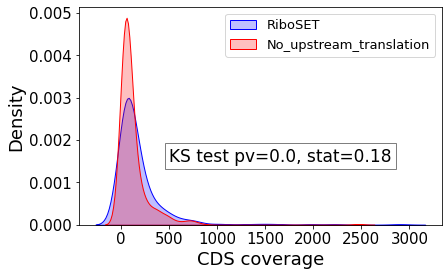

In [189]:
fig, ax = plt.subplots(1, 1, figsize=(6.5,4))

ax = sns.distplot(pairs_392_final['CDS_cov_r'].tolist(), 
                  hist=False, 
                  label = 'RiboSET',
                 kde_kws = {'shade': True, 'linewidth': 1},
                 color = 'blue')


ax = sns.distplot(pairs_392_final['CDS_cov_comp'].tolist(), 
                  hist=False, 
                  label = 'No_upstream_translation',
                 kde_kws = {'shade': True, 'linewidth': 1},
                 color = 'red')

ax.set_xlabel('CDS_cov_match')

stat, pvalue = stats.ks_2samp(pairs_392_final['CDS_cov_r'].tolist(), 
              pairs_392_final['CDS_cov_comp'].tolist())


ax.text(500, 0.0015, "KS test pv=%s, stat=%s" % (np.round(pvalue, 2), np.round(stat, 2)), 
        bbox=dict(facecolor='white', alpha=0.5), 
        fontsize=17)

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.set_ylabel('Density', fontsize= 18)
ax.set_xlabel('CDS coverage', fontsize= 18)

plt.legend(loc=0, prop={'size': 13})

plt.show()

In [823]:
RiboSET_ext

,tr_id1,Z_score,CDS_coverage,NTE_coverage,CDS_nonzero_fraction,NTE_nonzero_fraction
0,ENST00000379454,0.032101,298.318841,317.934783,0.332894,0.260870
1,ENST00000216281,0.139750,195.778990,441.650000,0.158709,0.194444
2,ENST00000409753,-0.352664,750.896774,295.191489,0.331183,0.262411
3,ENST00000321358,0.295986,156.987692,769.086957,0.062564,0.309353
4,ENST00000314940,-0.077727,535.316993,477.173913,0.332244,0.333333
...,...,...,...,...,...,...
4299,ENST00000433363,-0.195168,0.086116,0.000000,0.020504,0.000000
4300,ENST00000320955,-0.046426,0.026122,0.000000,0.003356,0.000000
4301,ENST00000287907,-0.074953,0.005587,0.000000,0.001862,0.000000
4303,ENST00000332995,-0.419139,1.390706,0.000000,0.153184,0.000000


# RiboSET ext (CDS cov > 0)

In [159]:
RiboSET_EXT_cds_cov_nonzero.shape[0]

NameError: name 'RiboSET_EXT_cds_cov_nonzero' is not defined

In [144]:
subset = no_ups[(no_ups['NTE_nonzero_fraction'] < 0.1) & 
   (no_ups['NTE_coverage'] < 1) & (no_ups['CDS_coverage'] > 0)].sort_values(by='CDS_coverage', ascending=False)

li2 = []

for i, el1 in enumerate(RiboSET_EXT_cds_cov_nonzero[['tr_id1', 'CDS_coverage']].to_numpy()):
    
    if i % 500 == 0:
        print ('tr %s is being processed' % i)
    tr_id_r = el1[0]
    CDS_cov_r = el1[1]
    
    for el in  subset[['tr_id', 'CDS_coverage']].to_numpy():
        tr_id = el[0]
        CDS_cov_comp = el[1]
        
        if np.abs(CDS_cov_comp - CDS_cov_r) < 20:
            li2.append([tr_id_r, CDS_cov_r, tr_id, CDS_cov_comp, np.abs(CDS_cov_comp - CDS_cov_r)])
            
distances = pd.DataFrame(li2, columns = ['tr_id_r', 'CDS_cov_r', 'tr_id1', 'CDS_cov_comp', 'dist'])


matrix = distances.pivot(index='tr_id_r', columns='tr_id1', values='dist')
dmat = matrix.to_numpy()
matrix[0:4]

A = list(matrix.index)
B = list(matrix.columns)

B_df = pd.DataFrame({'tr_id1': B, 'ind_B': list(range(0, len(B)))})
B_df[0:2]

tr 0 is being processed


KeyError: "['tr_id'] not in index"

In [ ]:
matrix.shape

In [ ]:
pairs = find(A, B, dmat)

In [ ]:
pairs_ind_df = pd.DataFrame(pairs,columns = ['ind_A', 'ind_B'])

pairs_ind_df['tr_id_r'] = A

pairs_ind_df['ind_B'] = pairs_ind_df['ind_B'].astype(int)

pairs_4k_final = pairs_ind_df.merge(B_df, on='ind_B', how='inner').merge(distances, on=['tr_id1', 'tr_id_r'], how='inner')

print (pairs_4k_final.tr_id_r.nunique(), pairs_4k_final.tr_id1.nunique())

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

ax = sns.distplot(pairs_4k_final['CDS_cov_r'].tolist(), 
                  hist=False, 
                  label = 'RiboSET_ext',
                 kde_kws = {'shade': True, 'linewidth': 1},
                 color = 'blue')


ax = sns.distplot(pairs_4k_final['CDS_cov_comp'].tolist(), 
                  hist=False, 
                  label = 'No_upstream_translation',
                 kde_kws = {'shade': True, 'linewidth': 1},
                 color = 'red')

ax.set_xlabel('CDS_cov_match')

ax.text(200, 0.004, "KS test pv=0.3, stat=0.22", 
        bbox=dict(facecolor='white', alpha=0.5), 
        fontsize=17)

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.set_ylabel('Density', fontsize= 18)
ax.set_xlabel('CDS coverage', fontsize= 18)

plt.legend(loc=0, prop={'size': 16})

plt.show()

In [ ]:
from scipy import stats

stats.ks_2samp(pairs_4k_final['CDS_cov_r'].tolist(), 
              pairs_4k_final['CDS_cov_comp'].tolist())

# pv is ~1 => distributions are not statistically different 

# Save dist with matched CDSs

In [ ]:
pairs_4k_final.to_csv('tmp_res/No_Upstream_Translation_CDS_match_4k.txt', sep='\t', index=False)

In [ ]:
# 390
pairs_392_final.to_csv('tmp_res/No_Upstream_Translation_CDS_match_392.txt', sep='\t', index=False)

In [ ]:
pairs_4k_final['tr_id'].nunique()

In [ ]:
pairs_4k_final['tr_id'].nunique()

# suggestions about RiboSET/PhyloSET we have 

In [ ]:
a = RiboSET['PhyloCSF120score'].tolist()
a1 = meta[meta['tr_id1'].isin(RiboSET_ext['tr_id'].unique())]['PhyloCSF120score'].tolist()

# matching set of 392 genes by CDS cov 
b = meta[meta['tr_id1'].isin(pairs_392_final['tr_id'].unique())]['PhyloCSF120score'].tolist()

# matching set of ~4k (3.6k) genes by CDS cov 
c =  meta[meta['tr_id1'].isin(pairs_4k_final['tr_id'].unique())]['PhyloCSF120score'].tolist()

len(a), len(a1), len(b), len(c), a1[0:2], a[0:2], b[0:2], c[0:2]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

ax = sns.distplot(a, 
                  hist=False, 
                  label = 'RiboSET',
                 kde_kws = {'shade': True, 'linewidth': 2},
                 color = 'purple')


ax = sns.distplot(b, 
                  hist=False, 
                  label = 'No_transl',
                 kde_kws = {'shade': True, 'linewidth': 2},
                 color = 'gold')

ax.set_xlabel('PhyloCSF_score_50codons')

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15, rotation = 0)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.set_xlabel('Density', fontsize= 18)
ax.set_ylabel('PhyloCSF score', fontsize= 18)

plt.legend(loc=5, prop={'size': 16})

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))

ax = sns.distplot(a1, 
                  hist=False, 
                  label = 'RiboSET_ext',
                 kde_kws = {'shade': True, 'linewidth': 2},
                 color = 'violet')


ax = sns.distplot(c, 
                  hist=False, 
                  label = 'No_transl_ext',
                 kde_kws = {'shade': True, 'linewidth': 2},
                 color = 'gold')

ax.set_xlabel('PhyloCSF_score_50codons')

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15, rotation = 0)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.set_xlabel('Density', fontsize= 18)
ax.set_ylabel('PhyloCSF score', fontsize= 18)

plt.legend(loc=2, prop={'size': 16})

plt.show()

In [466]:
RiboSET_genes = RiboSET['gene'].tolist()
PhyloSET_genes = list(PhyloSET['gene'].unique())

############
tmp = RiboSET_ext[['tr_id']]
tmp.columns = ['tr_id1']
RiboSET_ext_genes =  list(tmp.merge(meta[['tr_id1', 'gene']], on='tr_id1', how='inner')['gene'].unique())
###########

print (len(RiboSET_genes), len(PhyloSET_genes), len(RiboSET_ext_genes))

# Ivanov et al sets 
# genes from 2011 paper
genes_42 = 'RASL10B,FGFR1,YPEL2,ENOX2,UFSP1,WDR26,TIAL1,YPEL4,NGF,TRPV6,KCTD11,STARD10,YPEL1,R3HCC1,ZFP62,NHLRC4,EPHX3,C1QL4,TLE3,HDGF,ANKRD42,FAM217B,NFKBID,PTEN,RNF187,METTL23,TMEM8B,VANGL2,FNDC5,C1QL1,CITED1,EIF4G3,HELZ2,CYTH2,NTF3,MFSD4B,C1QL3,KCNN4,IFT46,RASD2,CITED2,C1QL2'.split(',')
genes_17 = 'GTF3A, EIF4G2, SP3, PRPS1L1, TEAD4, TEAD3, CACNG8, OAZ3, TEAD1, DDX17, VEGFA, NR1I2, HCK, WT1, BAG1, NPW, MYC'.split(', ')

already_ann_24 = ['FNDC5', 'OAZ3', 'RNF187', 'SP3', 'NR1I2', 'TEAD3', 'VEGFA',
 'PRPS1L1', 'TRPV6', 'R3HCC1', 'MYC', 'BAG1', 'EIF4G2', 'WT1', 'TEAD4', 'GTF3A', 
                  'NPW', 'KCTD11', 'YPEL2', 'NFKBID', 'CACNG8', 'HCK', 'YPEL1', 'DDX17']

remaining_7 = ['ANKRD42', 'C1QL1', 'HELZ2', 'PTEN', 'TIAL1', 'WDR26', 'ZFP62']

not_yet_ann_28 = list(set(genes_42+genes_17) - set(already_ann_24+remaining_7))

print (len(already_ann_24), len(not_yet_ann_28))

390 60 4265
24 28


In [491]:
PCSF_24genes = pd.read_csv('../tmp_res/PCSF_for_24_ann.txt', sep='\t')

PCSF_24genes_score = PCSF_24genes[['gene', 'PhyloCSF120score']].drop_duplicates()['PhyloCSF120score'].tolist()

PCSF_28genes_score = meta[meta['gene'].isin(not_yet_ann_28)][['gene', 'PhyloCSF120score']].drop_duplicates()['PhyloCSF120score'].tolist()

print (PCSF_24genes.gene.nunique())

24


In [492]:
PCSF_24genes[PCSF_24genes['PhyloCSF120score'] > 0]['gene'].nunique()

11

In [514]:
g = pd.DataFrame({'PCSF_score': PCSF_28genes_score})
g['subset'] = 'un_28'
e = pd.DataFrame({'PCSF_score': PCSF_24genes_score})
e['subset'] = 'ann_24'
f = pd.concat([e,g])

No handles with labels found to put in legend.


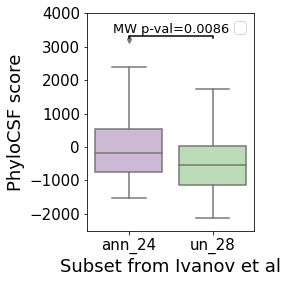

In [521]:
# boxplots 

import seaborn as sns

fig,ax = plt.subplots(figsize=(3,4))

ax = sns.boxplot(x="subset", y="PCSF_score", data=f, palette="PRGn")

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = f['PCSF_score'].max() + 30, 50, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "MW p-val=0.0086", ha='center', va='bottom', 
         color=col, fontsize= 13)

ax.set_ylim(-2500, 4000)

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=15, rotation = 0)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.set_xlabel('Subset from Ivanov et al', fontsize= 18)
ax.set_ylabel('PhyloCSF score', fontsize= 18)

plt.legend(loc=0, prop={'size': 16})

plt.show()

In [522]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(PCSF_24genes_score, PCSF_28genes_score)

stat, p

(1053.0, 0.008678951548390169)

In [ ]:
RiboSET_genes = RiboSET['gene'].tolist()
PhyloSET_genes = list(PhyloSET['gene'].unique())

############
tmp = RiboSET_ext[['tr_id']]
tmp.columns = ['tr_id1']
RiboSET_ext_genes =  list(tmp.merge(meta[['tr_id1', 'gene']], on='tr_id1', how='inner')['gene'].unique())
###########

print (len(RiboSET_genes), len(PhyloSET_genes), len(RiboSET_ext_genes))

# Van Damme et al sets 

In [568]:
len(RiboSET_ext_genes), len(RiboSET_genes), len(PhyloSET_genes)

(4265, 390, 60)

In [596]:
localisation_df = pd.read_csv('../data/subcellular_location.tsv', sep='\t')

print (localisation_df['Gene name'].nunique())
print (localisation_df[localisation_df['Reliability'].isin(['Supported', 'Approved', 'Enhanced'])]['Gene name'].nunique())
print (localisation_df['Reliability'].unique())

# filter out uncertain location 
sel_loc = localisation_df[localisation_df['Reliability'].isin(['Supported', 'Approved', 'Enhanced'])][['Gene name',
                                                                                                      'Main location',
                                                                                                      'Additional location', 'Extracellular location']]

sel_loc.columns = ['gene', 'Main location', 'Additional location', 'Extracellular location']

sel_loc['locations'] = sel_loc['Main location'].astype(str)+';'+sel_loc['Additional location'].astype(str)+';'+sel_loc['Extracellular location'].astype(str)
sel_loc['locations'] = sel_loc['locations'].str.replace('nan;', '').str.replace('nan', '').str.rstrip(';')

sel_loc[0:2]

12804
12086
['Approved' 'Uncertain' 'Supported' 'Enhanced']


,gene,Main location,Additional location,Extracellular location,locations
0,TSPAN6,Cell Junctions;Cytosol,Nucleoli fibrillar center,NaN,Cell Junctions;Cytosol;Nucleoli fibrillar center
2,C1orf112,Mitochondria,NaN,NaN,Mitochondria


### PhyloSET to HPA loc 

In [631]:
truly_2diff_loc = [
 'Cytosol;Actin filaments',
 'Cytosol;Golgi apparatus;Plasma membrane',
 'Cytosol;Nucleoplasm',
 'Cytosol;Plasma membrane;Centrosome;Cytokinetic bridge;Nucleoplasm',
 'Cytosol;Plasma membrane;Nucleoplasm',
 'Intermediate filaments;Nucleoli;Nucleoplasm',
 'Lysosomes;Vesicles',
 'Mitochondria;Nuclear membrane',
 'Mitochondria;Nucleoplasm',
 'Nuclear membrane;Nucleoplasm',
 #'Nucleoli;Nucleoli rim;Nucleoplasm',
 #'Nucleoli;Nucleoplasm',
 'Nucleoplasm;Cytosol',
 'Nucleoplasm;Cytosol;Nucleoli fibrillar center',
 'Nucleoplasm;Plasma membrane',
 'Nucleoplasm;Plasma membrane;Cytosol;Vesicles',
 'Nucleoplasm;Vesicles',
 'Plasma membrane;Cytosol;Endoplasmic reticulum;Nucleoplasm',
 'Plasma membrane;Vesicles',
 'Vesicles;Nucleoplasm'
  ]

In [670]:
PhyloSET_loc = PhyloSET.merge(sel_loc, on='gene', how='inner')
print (PhyloSET_loc.shape[0])

nucleoplasm_count = 0
cytosol_count = 0
Mitochondria_count = 0
membrane_count = 0


two_more_loc = 0

all_locations = set()
two_more_loc_ = set()

for i,x in enumerate(PhyloSET_loc[['gene', 'locations']].drop_duplicates()['locations'].tolist()):
   
    #print (x)
    for loc in x.split(';'):
        all_locations.add(loc)
    
    if x == 'Nucleoplasm':
        nucleoplasm_count += 1
    if x == 'Cytosol':
        cytosol_count += 1
    if x == 'Mitochondria':
        Mitochondria_count += 1
    if x == 'Plasma membrane':
        membrane_count += 1
    if x == 'Vesicles':
        Vesicles += 1
        
    if len(x.split(';')) >= 2:
        #if x in truly_2diff_loc:
        two_more_loc += 1
        two_more_loc_.add(x)
        


n = PhyloSET_loc[['gene', 'locations']].drop_duplicates().shape[0]
nucleoplasm_count/n*100, cytosol_count/n*100, Mitochondria_count/n*100, membrane_count/n*100, two_more_loc/n*100

59


(27.500000000000004, 12.5, 0.0, 2.5, 50.0)

In [671]:
perc_PhyloSET = pd.DataFrame([50, 50], 
                   index=['>=2 locations', '1 location'])
                       
perc_PhyloSET.columns = ['PhyloSET']

perc_PhyloSET

,PhyloSET
>=2 locations,50
1 location,50


### RiboSET loc HPA

In [672]:
RiboSET_loc = RiboSET.merge(sel_loc, on='gene', how='inner')
print (RiboSET_loc.shape[0])

nucleoplasm_count = 0
cytosol_count = 0
Mitochondria_count = 0
membrane_count = 0

two_more_loc = 0
two_more_loc_ = set()

all_locations = set()

for i,x in enumerate(RiboSET_loc['locations'].tolist()):
    
    for loc in x.split(';'):
        all_locations.add(loc)
    
    if x == 'Nucleoplasm':
        nucleoplasm_count += 1
    if x == 'Cytosol':
        cytosol_count += 1
    if x == 'Mitochondria':
        Mitochondria_count += 1
    if x == 'Plasma membrane':
        membrane_count += 1
        
    if len(x.split(';')) >= 2:
        two_more_loc += 1
        two_more_loc_.add(x)
        #if x in truly_2diff_loc:
            #two_more_loc += 1

n = RiboSET_loc.shape[0]
nucleoplasm_count/n*100, cytosol_count/n*100, Mitochondria_count/n*100, membrane_count/n*100, two_more_loc/n*100

317


(14.195583596214512,
 12.302839116719243,
 4.100946372239748,
 1.8927444794952681,
 52.6813880126183)

In [673]:
perc_RiboSET = pd.DataFrame([52.68, 100-52.68], 
                   index=['>=2 locations', '1 location'])
                       
perc_RiboSET.columns = ['RiboSET']

perc_RiboSET

,RiboSET
>=2 locations,52.68
1 location,47.32


### Match 392 loc

In [674]:
tmp = meta[['tr_id1', 'gene']]
tmp.columns = ['tr_id', 'gene']
Match_392_loc = pairs_392_final[['tr_id']].merge(tmp, on='tr_id', how='inner').merge(sel_loc, on='gene', how='inner')

nucleoplasm_count = 0
cytosol_count = 0
Mitochondria_count = 0
membrane_count = 0

two_more_loc = 0

all_locations = set()

for i,x in enumerate(Match_392_loc['locations'].tolist()):
    
    for loc in x.split(';'):
        all_locations.add(loc)
    
    if x == 'Nucleoplasm':
        nucleoplasm_count += 1
    if x == 'Cytosol':
        cytosol_count += 1
    if x == 'Mitochondria':
        Mitochondria_count += 1
    if x == 'Plasma membrane':
        membrane_count += 1
        
    if len(x.split(';')) >= 2:
        two_more_loc += 1
        #if x in truly_2diff_loc:
            #two_more_loc += 1
        
n = Match_392_loc['locations'].shape[0]
nucleoplasm_count/n*100, cytosol_count/n*100, Mitochondria_count/n*100, membrane_count/n*100, two_more_loc/n*100

(8.360128617363344,
 8.681672025723474,
 8.360128617363344,
 1.929260450160772,
 57.234726688102896)

In [675]:
perc_match = pd.DataFrame([57.23, 100-57.23], 
                   index=['>=2 locations', '1 location'])
                       
perc_match.columns = ['untransl']

perc_match

,untransl
>=2 locations,57.23
1 location,42.77


In [677]:
tmp = pd.concat([perc_match, perc_RiboSET, perc_PhyloSET], axis=1).reset_index()

tmp2 = pd.melt(tmp, id_vars='index', value_vars=['untransl', 'RiboSET', 'PhyloSET'])

tmp2.columns = ['type', 'subset', 'fraction']

tmp2

,type,subset,fraction
0,>=2 locations,untransl,57.23
1,1 location,untransl,42.77
2,>=2 locations,RiboSET,52.68
3,1 location,RiboSET,47.32
4,>=2 locations,PhyloSET,50.00
5,1 location,PhyloSET,50.00


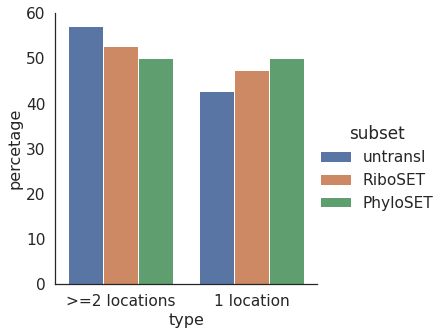

In [695]:
#fig,ax = plt.subplots(figsize=(5,5))

sns.set(font_scale = 1.4)
sns.set_style("white")

g = sns.catplot(x = "type",       # x variable name
            y = "fraction",       # y variable name
            hue = "subset",  # group variable name
            data = tmp2,     # dataframe to plot
            kind = "bar")

# We change the fontsize of minor ticks label 
#ax.tick_params(axis='both', which='major', labelsize=15, rotation = 0)
#ax.tick_params(axis='both', which='minor', labelsize=15)


g.set_axis_labels(x_var="type", y_var="percetage", fontsize=16)

### RiboSET ext 

In [698]:
tmp = RiboSET_ext[['tr_id']]
tmp.columns = ['tr_id1']
RiboSET_ext_genes = tmp.merge(meta[['tr_id1', 'gene']], on='tr_id1', how='inner')

In [699]:
RiboSET_ext_loc = RiboSET_ext_genes.merge(sel_loc, on='gene', how='inner')
print (RiboSET_ext_loc.shape[0])

nucleoplasm_count = 0
cytosol_count = 0
Mitochondria_count = 0
membrane_count = 0

two_more_loc = 0
two_more_loc_ = set()

all_locations = set()

for i,x in enumerate(RiboSET_ext_loc['locations'].tolist()):
    
    for loc in x.split(';'):
        all_locations.add(loc)
    
    if x == 'Nucleoplasm':
        nucleoplasm_count += 1
    if x == 'Cytosol':
        cytosol_count += 1
    if x == 'Mitochondria':
        Mitochondria_count += 1
    if x == 'Plasma membrane':
        membrane_count += 1
        
    if len(x.split(';')) >= 2:
        two_more_loc += 1
        two_more_loc_.add(x)
        #if x in truly_2diff_loc:
            #two_more_loc += 1

n = RiboSET_ext_loc.shape[0]
nucleoplasm_count/n*100, cytosol_count/n*100, Mitochondria_count/n*100, membrane_count/n*100, two_more_loc/n*100

2969


(14.179858538228359,
 7.443583698214887,
 4.041764904008083,
 2.3913775682047826,
 58.268777366116545)

In [705]:
RiboSET_ext_loc_df = pd.DataFrame([58.268, 100-58.268], 
                   index=['>=2 locations', '1 location'])
                       
RiboSET_ext_loc_df.columns = ['RiboSET_ext']

RiboSET_ext_loc_df

,RiboSET_ext
>=2 locations,58.268
1 location,41.732


### Matching ext 

In [706]:
tmp = meta[['tr_id1', 'gene']]
tmp.columns = ['tr_id', 'gene']
Match_4k_loc = pairs_4k_final[['tr_id']].merge(tmp, on='tr_id', how='inner').merge(sel_loc, on='gene', how='inner')

nucleoplasm_count = 0
cytosol_count = 0
Mitochondria_count = 0
membrane_count = 0

two_more_loc = 0

all_locations = set()

for i,x in enumerate(Match_4k_loc['locations'].tolist()):
    
    for loc in x.split(';'):
        all_locations.add(loc)
    
    if x == 'Nucleoplasm':
        nucleoplasm_count += 1
    if x == 'Cytosol':
        cytosol_count += 1
    if x == 'Mitochondria':
        Mitochondria_count += 1
    if x == 'Plasma membrane':
        membrane_count += 1
        
    if len(x.split(';')) >= 2:
        two_more_loc += 1
        #if x in truly_2diff_loc:
            #two_more_loc += 1
        
n = Match_4k_loc['locations'].shape[0]
nucleoplasm_count/n*100, cytosol_count/n*100, Mitochondria_count/n*100, membrane_count/n*100, two_more_loc/n*100

(11.550268610897927,
 7.252494244052188,
 4.336147352264006,
 2.83960092095165,
 61.128165771297006)

In [707]:
perc_match = pd.DataFrame([61.12, 100-61.12], 
                   index=['>=2 locations', '1 location'])
                       
perc_match.columns = ['untransl']

perc_match

,untransl
>=2 locations,61.12
1 location,38.88


In [709]:
tmp = pd.concat([perc_match, RiboSET_ext_loc_df], axis=1).reset_index()

tmp2 = pd.melt(tmp, id_vars='index', value_vars=['untransl', 'RiboSET_ext'])

tmp2.columns = ['type', 'subset', 'fraction']

tmp2

,type,subset,fraction
0,>=2 locations,untransl,61.120
1,1 location,untransl,38.880
2,>=2 locations,RiboSET_ext,58.268
3,1 location,RiboSET_ext,41.732


/home/alla/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


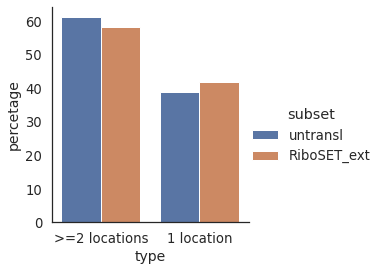

In [723]:
#fig,ax = plt.subplots(figsize=(5,5))

sns.set(font_scale = 1.2)
sns.set_style("white")

g = sns.catplot(x = "type",       # x variable name
            y = "fraction",       # y variable name
            hue = "subset",  # group variable name
            data = tmp2,     # dataframe to plot
            kind = "bar",
               size=4, aspect=1)

# We change the fontsize of minor ticks label 
#ax.tick_params(axis='both', which='major', labelsize=15, rotation = 0)
#ax.tick_params(axis='both', which='minor', labelsize=15)


g.set_axis_labels(x_var="type", y_var="percetage", fontsize=14)

SignalP, TargetP, or TMHMM detection on RiboSET and untr_matched_sets 

## RiboSET SignalP parse 

In [740]:
from Bio.Seq import Seq

RiboSET['start_codon_local_coo_start'] = [int(x.split('; ')[1].split('-')[0])-1 for x in RiboSET['Riboseq_Summary'].tolist()]

In [741]:
riboset_fasta = open('../data/tmhmm_and_phobius_data/riboset.fasta', 'w')

li = []

for row in RiboSET[['tr_id', 'gene', 'N_term_start1', 'N_term_end1', 'start_codon_local_coo_start']].to_numpy():
    tr_id  = row[0]
    gene = row[1]
    N_term_start = row[2]
    N_term_stop = row[3]
    N_term_start_pred = row[-1] - 1
    tr_seq = metadata_pc_g25[metadata_pc_g25['tr_id'] == tr_id].iloc[0].transcript_seq 
    cds_stop = metadata_pc_g25[metadata_pc_g25['tr_id'] == tr_id].iloc[0].cds_stop_pos
    cds_start = metadata_pc_g25[metadata_pc_g25['tr_id'] == tr_id].iloc[0].cds_start_pos
    
    nte_seq_nt1 = tr_seq[N_term_start:cds_stop]
    nte_seq_nt2 = tr_seq[N_term_start_pred:cds_stop]
    
    nte_seq_aa1 = str(Seq(nte_seq_nt1).translate())
    nte_seq_aa2 = 'M'+str(Seq(nte_seq_nt2).translate())[1:]
    
    # position of CDS in NTE_aa: 
    # 5'    N_term_start_pred    cds_start_pos
    # 
    cds_start_aa_in_ext2 = (cds_start - N_term_start_pred) // 3
    
    li.append([tr_id, gene, nte_seq_aa1, nte_seq_aa2, cds_start_aa_in_ext2, 
              cds_start_aa_in_ext2])
    
    riboset_fasta.write('>'+tr_id+'_'+gene+'\n')
    riboset_fasta.write(nte_seq_aa2[:-1]+'\n')
  
riboset_fasta.close()
        
NTE_aa_df_ribo = pd.DataFrame(li, columns = ['tr_id', 'gene', 'nte_seq_aa1', 'nte_seq_aa2',
                                       'cds_start_aa_in_ext2', 'ext_len'])


/home/alla/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [742]:
signalP_df_r = pd.read_csv('../data/SignalP_RiboSET_output_protein_type.txt', sep='\t', comment='#', header=None)
signalP_df_r.columns = ['id', 'class', 'SP_score', 'Other_score', 'SP_seq']
signalP_df_r['tr_id'] = [x.split('_')[0] for x in signalP_df_r['id'].tolist()]
signalP_df_r['gene'] = [x.split('_')[-1] for x in signalP_df_r['id'].tolist()]

# exclude AUGs 
signalP_df_r = signalP_df_r[~signalP_df_r['gene'].isin(['STIM2', 'AP3S1', 'PTPRJ'])]

print ('# of genes with pred signalP from RiboSET')
signalP_df_r[(signalP_df_r['class'] != 'OTHER') & 
             (signalP_df_r['SP_seq'] != 'CS pos: ?. Probable protein fragment')].gene.nunique()

# of genes with pred signalP from RiboSET


28

In [744]:
tmp = signalP_df_r[(signalP_df_r['class'] != 'OTHER') & 
                              (signalP_df_r['SP_seq'] != 'CS pos: ?. Probable protein fragment')]
tmp['SP_end_pos'] = [int(x.split('CS pos: ')[1].split('-')[0]) for x in tmp['SP_seq'].tolist()]

tmp = tmp.merge(NTE_aa_df_ribo[['tr_id', 'gene', 'cds_start_aa_in_ext2']], on=['tr_id', 'gene'], how='inner')

tmp['SP_start_pos'] = tmp['SP_end_pos'] - 16

tmp[0:2]

/home/alla/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,class,SP_score,Other_score,SP_seq,tr_id,gene,SP_end_pos,cds_start_aa_in_ext2,SP_start_pos
0,ENST00000399728.5_STMN1,SP(Sec/SPI),0.769171,0.230829,CS pos: 19-20. ASS-DI. Pr: 0.6043,ENST00000399728.5,STMN1,19,15,3
1,ENST00000370109.7_DPH5,SP(Sec/SPI),0.687048,0.312952,CS pos: 25-26. GDA-KD. Pr: 0.5493,ENST00000370109.7,DPH5,25,13,9


### CS before CDS start

In [745]:
tmp[tmp['cds_start_aa_in_ext2'] >= tmp['SP_end_pos']]

,id,class,SP_score,Other_score,SP_seq,tr_id,gene,SP_end_pos,cds_start_aa_in_ext2,SP_start_pos
23,ENST00000395841.6_RAE1,SP(Sec/SPI),0.564221,0.435779,CS pos: 16-17. ARA-GS. Pr: 0.3038,ENST00000395841.6,RAE1,16,40,0


### genes with CS-16 position before CDS 

In [746]:
tmp[tmp['cds_start_aa_in_ext2'] >= tmp['SP_start_pos']]['gene'].tolist()

['STMN1', 'DPH5', 'ADAM15', 'ZNF622', 'SUPT4H1', 'RAE1']

# Re-do all the stuff + suggestions for RiboSET extended

### Fig4A Dist of pred starts barplot 

### Fig4B TIS-score dist: PhyloSET, RiboSET_ext_pred, RiboSET_ext_all

### Fig4C: LOGO of TIS (R) 

### Fig4D RNAfold for non-AUG, weak AUG, strong AUG set of X genes 

### Fig4E: dist of PCSF score for PhyloSET, RiboSET_ext, X_no_translation_upstream 50-codons 

Combine sets: 

* X_no_translation_upstream -> 50codons or less -> genomic coo 
* RiboSET_ext -> 50codons or less -> genomic coo
* already ann 24 genes: take upstream 50codons from prev ann AUG

2*5000 + 24 genes -> PhyloCSF score -> distribution 

##### Comment1: diff between RiboSET and no_translation_upstream_SET in PhyloCSF score 

### Fig 4I,H: examples of genes. can keep them 

### Fig4J: need to add more genes with TM? 

### Fig.4F,G ovlp with HPA, do we need that? 

### Fig3E UpsetR plot

### Supplementary table 5: gene ontology 